# Running EVE from command lines
EVE can be fully ran from command lines. Here are examples that fully provide an example. This notebook will perform loading, finding, fitting, post-processing, and displaying of EveSMLM-recorded DNA-PAINT nanoruler

Generally, finding/fitting routines exact methodology are stored in the RunInfo.txt after a GUI run, and thus can be extracted from there.

### Importing of code
All routines are loaded from EVE, along with some third-party packages

In [1]:
#Import all required scripts that are used by Eve
from CandidateFitting import *
from CandidateFinding import *
from Visualisation import *
from PostProcessing import *
from CandidatePreview import *
from Utils import *
from Utils import utils, utilsHelper
from EventDistributions import eventDistributions

#Importing 3rd-party packages
import appdirs
import os
import json

#Determining eve_data location
app_data_dir = appdirs.user_data_dir()
eve_data_folder = os.path.join(app_data_dir, 'UniBonn', 'Eve')

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


### Loading of EBS data
We recommend storing EBS event data in the HDF5 format, possible to convert in the Prophesee software. HDF5 event data can be loaded as follows:

In [2]:
#Loading the events from HDF between two timepoints
fileLoc = 'Data\DNAPAINT.hdf5' #The location of a hdf5 file
events = utils.timeSliceFromHDF(fileLoc,requested_start_time_ms = 0,requested_end_time_ms=30*60e3)[0] #Loading the first 30 minutes of data

print(f"Event loading complete! Loaded {len(events)} events")

End of file reached while chunking HDF5
Event loading complete! Loaded 3435056 events


### Loading of global settings
EVE global settings are required, and can be loaded from the last GUI run like this, and/or set as shown.

In [3]:
#Load the global settings that were last used
with open(os.path.join(eve_data_folder,'GlobSettingStorage.json'), 'r') as file:
    globalSettings = json.load(file)

#Global settings can be displayed and/or changed
globalSettings['MaxFindingBoundingBoxXY']['value'] = 20
print(json.dumps(globalSettings, indent=4))

{
    "MinFindingBoundingBoxXY": {
        "value": "4",
        "displayName": "Minimum size of a bounding box in px units"
    },
    "MinFindingBoundingBoxT": {
        "value": 10,
        "displayName": "Minimum size of a bounding box in ms units"
    },
    "MaxFindingBoundingBoxXY": {
        "value": 20,
        "displayName": "Maximum size of a bounding box in px units"
    },
    "MaxFindingBoundingBoxT": {
        "value": "1000",
        "displayName": "Maximum size of a bounding box in us units"
    },
    "XYTOutlierRemoval": {
        "value": 0,
        "displayName": "XYTOutlierRemoval"
    },
    "XYTOutlierRemoval_multiplier": {
        "value": 2.5,
        "displayName": "STD multiplier for XYTOutlierRemoval"
    },
    "PixelSize_nm": {
        "value": "80",
        "displayName": "Pixel size (nm)"
    },
    "MetaVisionPath": {
        "value": "C:\\Program Files\\Prophesee\\lib\\python3\\site-packages",
        "displayName": "MetaVision SDK Path"
    },
    "S

### Finding routine
We look at all available functions currently present in the CandidateFinding folders, and perform an EigenFeature routine on the events

In [4]:
#Obtain all available routines in CandidateFinding
AllAvailableFunction = utils.functionNamesFromDir("CandidateFinding")
AllAvailableFunctionUserData = utils.functionNamesFromDir(eve_data_folder+"/CandidateFinding")

#Give terminal information about the finding routines
print("All available Finding Routines:")
for index, function in enumerate(AllAvailableFunction):
    print(f"{index+1}: {function}")

if len(AllAvailableFunctionUserData) > 0:
    print(f"\nAdditional available Finding Routines from UserData folder ({eve_data_folder+'/CandidateFinding'}):")
    for index, function in enumerate(AllAvailableFunctionUserData):
        print(f"{index+1}: {function}")

All available Finding Routines:
1: DBSCAN.DBSCAN_onlyHighDensity
2: DBSCAN.DBSCAN_allEvents
3: DBSCAN.DBSCAN_allEvents_remove_outliers
4: EigenFeatureAnalysis.eigenFeature_analysis
5: EigenFeatureAnalysis.eigen_feature_analysis_autoRadiusSelect
6: EigenFeatureAnalysis.eigenFeature_analysis_and_bbox_finding
7: FrameBasedFinding.FrameBased_finding
8: LoadExistingFinding.LoadExistingFinding


In [5]:
#We can also request information about required and optional parameters from one of these functions:
print(utils.printInformationFromFunction('EigenFeatureAnalysis.eigenFeature_analysis'))

Eigen-feature analysis
Help info 
Eigen-feature analysis. Performs a spectral clustering method on the data to separate SMLM signal from noise.
Required parameters
Linearity cutoff [linearity_cutoff]: 
	Linearity (0-1) cutoff 
	Default value: 0.7
Maximum Eigenvalue cutoff [max_eigenval_cutoff]: 
	Cutoff of maximum eigenvalue. Set to zero to auto-determine this! 
	Default value: 0.0
Number of neighbours [search_n_neighbours]: 
	Number of (closest) neighbours for the covariance determination 
	Default value: 50
Ratio ms to px [ratio_ms_to_px]: 
	Ratio of milliseconds to pixels. 
	Default value: 20.0
DBSCAN epsilon [DBSCAN_eps]: 
	Eps of DBSCAN. 
	Default value: 4
DBSCAN nr. neighbours [DBSCAN_n_neighbours]: 
	Minimum nr of points for DBSCAN cluster. 
	Default value: 20
Optional parameters
Debug Boolean [debug]: 
	Get some debug info. 
	Default value: False



### Running a finding method
Based on the information above, we can run an EigenFeature finding on this dataset. Please observe that all keyword-arguments are strings in the command-line.

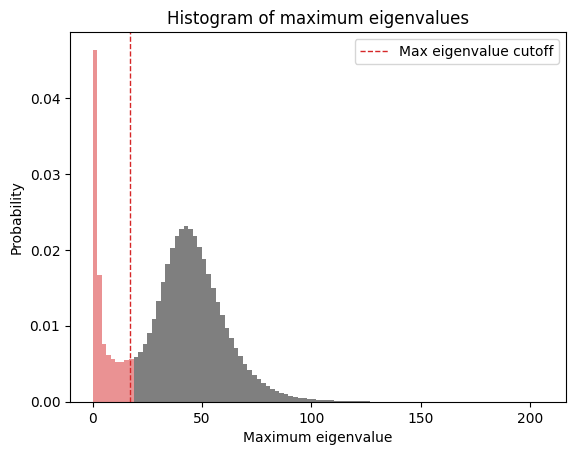

Finding complete! 6109 candidates are found. 
 
Provided metadata:
SpectralClustering Finding ran for 23.755502939224243 seconds.


In [6]:
#Performing EigenFeature finding
#Note that by setting debug to true, we gain some insight about the EigenFeature method as well.
FindingResults = EigenFeatureAnalysis.eigenFeature_analysis(events,globalSettings,linearity_cutoff="0.7",max_eigenval_cutoff="17",search_n_neighbours="30",ratio_ms_to_px="10",DBSCAN_eps="3",DBSCAN_n_neighbours="12",debug="True") #type:ignore

print(f"Finding complete! {len(FindingResults[0])} candidates are found. \n \nProvided metadata:\n{FindingResults[1]}")

### Fitting routine
Investigating and using the fitting routines is very similar to finding:

In [7]:
#Obtain all available routines in CandidateFitting
AllAvailableFunction = utils.functionNamesFromDir("CandidateFitting")
AllAvailableFunctionUserData = utils.functionNamesFromDir(eve_data_folder+"/CandidateFitting")

#Give terminal information about the fitting routines
print("All available Fitting Routines:")
for index, function in enumerate(AllAvailableFunction):
    print(f"{index+1}: {function}")

if len(AllAvailableFunctionUserData) > 0:
    print(f"\nAdditional available Fitting Routines from UserData folder ({eve_data_folder+'/CandidateFitting'}):")
    for index, function in enumerate(AllAvailableFunctionUserData):
        print(f"{index+1}: {function}")
#We can also request information about required and optional parameters from one of these functions:
print('\n')
print(utils.printInformationFromFunction('GaussianFitting.LogGaussian2D'))

All available Fitting Routines:
1: GaussianFitting.Gaussian2D
2: GaussianFitting.LogGaussian2D
3: GaussianFitting.Gaussian3D
4: LoadExistingFitting.LoadExistingFitting
5: PhasorFitting.PhasorFitting
6: PhasorFitting.PhasorFitting_customTimeFit
7: Radial_Symmetry.RadialSym2D
8: Radial_Symmetry.RadialSym3D
9: SimpleOperants.AverageXYpos
10: UnivariateSplineFitting.Spline1D


2D LogGaussian
Help info 
Makes a 2D log-gaussian fit (via least squares) to determine the localization parameters.
Required parameters
expected width [expected_width]: 
	Expected width of log-Gaussian fit (in nm) 
	Default value: 150.0
fitting tolerance [fitting_tolerance]: 
	Discard localizations with uncertainties larger than this value times the pixel size.  
	Default value: 1.0



In [8]:
#Performing LogGaussian fitting
FittingResults = GaussianFitting.LogGaussian2D(FindingResults[0],globalSettings,expected_width="150.0",fitting_tolerance="1.0",dist_kwarg="Hist2d_xy",time_kwarg="LognormCDFFirstEvents_weighted") #type:ignore

print(f"Fitting complete! {len(FittingResults[0])} localizations are found. \n \nProvided metadata: \n{FittingResults[1]}")

Fitting complete! 6109 localizations are found. 
 
Provided metadata: 
Removed 88/6109 (1.44%) candidates due to RuntimeError.
Took average time instead of fitted time for 214/6109 (3.50%) candidates due to TimeRuntimeError.
Took average time instead of fitted time for 32/6109 (0.52%) candidates due to TimeToleranceWarning.
Removed 167/6109 (2.73%) candidates due to ToleranceWarning.

Candidates discarded by RuntimeError: [72, 118, 124, 231, 303, 337, 344, 352, 395, 435, ..., 5575, 5616, 5664, 5727, 5734, 5801, 5822, 5887, 5909, 5968]
Candidates for which average time was taken instead of fitted time due to TimeRuntimeError:[0, 10, 16, 57, 63, 74, 76, 92, 113, 125, ..., 5785, 5799, 5843, 5878, 5969, 5986, 5999, 6025, 6026, 6087]
Candidates for which average time was taken instead of fitted time due to TimeToleranceWarning:[242, 769, 823, 864, 985, 1005, 1043, 1558, 1583, 1660, ..., 3965, 4204, 4462, 4696, 5013, 5185, 5276, 5474, 5496, 5937]
Candidates discarded by ToleranceWarning: [53

### Post-Processing
Similar to above, we can perform post-processing on the data. Post-processing routines expect both the finding and fitting results, and thus can in theory use information from both. We will perform a drift-correction, which only requires localizations (fitting results)

In [9]:
#Obtain all available routines in PostProcessing
AllAvailableFunction = utils.functionNamesFromDir("PostProcessing")
AllAvailableFunctionUserData = utils.functionNamesFromDir(eve_data_folder+"/PostProcessing")

#Give terminal information about the postprocessing routines
print("All available PostProcessing Routines:")
for index, function in enumerate(AllAvailableFunction):
    print(f"{index+1}: {function}")

if len(AllAvailableFunctionUserData) > 0:
    print(f"\nAdditional available PostProcessing Routines from UserData folder ({eve_data_folder+'/PostProcessing'}):")
    for index, function in enumerate(AllAvailableFunctionUserData):
        print(f"{index+1}: {function}")

#We can also request information about one of these functions:
print('\n')
print(utils.printInformationFromFunction('DriftCorr_DME.DriftCorr_entropyMin'))

All available PostProcessing Routines:
1: AveragePSF.AveragePSF
2: DriftCorr_DME.Load_storedData
3: DriftCorr_DME.DriftCorr_entropyMin
4: DriftCorr_DME.DriftCorr_entropyMin_3D
5: DriftCorr_DME.DriftCorr_RCC
6: Filter.Regular_filter
7: PolarityMatching.PolarityMatching
8: PolarityMatching.PolarityMatching_NeNA
9: PolarityMatching.PolarityMatching_NeNASpatial
10: PolarityMatching.PolarityMatching_time
11: ResolutionDetermination.FRC
12: Filter2.Regular_filter2

Additional available PostProcessing Routines from UserData folder (C:\Users\Koen Martens\AppData\Local\UniBonn\Eve/PostProcessing):
1: Filter2.Regular_filter2
2: Filter2.Regular_filter2


Drift correction by entropy minimization [2D]
Help info 
Drift correction from Cnossen et al..
Required parameters
Frame time used in DME [frame_time_for_dme]: 
	Frame-time used for drift-correction (in ms) 
	Default value: 100.0
Frames per bin [frames_per_bin]: 
	Number of frames in every bin for dme drift correction  
	Default value: 50
Visuali

RCC: Computing image cross correlations. Image stack shape: (10, 202, 202). Size: 1 MB


100%|██████████| 45/45 [00:02<00:00, 21.61it/s]

Computing initial coarse drift estimate... (455 frames/bin)



75. Rejecting step. Score: 3.785799. Stepsize: 8.998261e-09 [cuda=0, dims=2]: : 77it [00:03, 22.20it/s]


Estimating drift... (50 frames/bin)



72. Rejecting step. Score: 3.235205. Stepsize: 4.146399e-07 [cuda=0, dims=2]: : 75it [00:03, 20.89it/s]


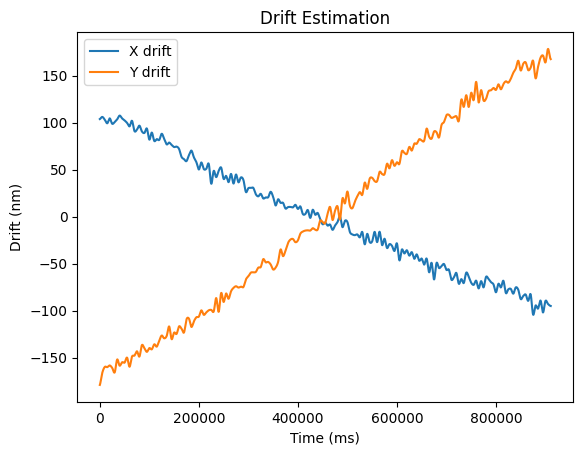

Drift correction complete! 5854 localizations are found. 
 
Provided metadata: 
Driftcorrection DME-2D applied with settings {'frame_time_for_dme': '100', 'frames_per_bin': '50', 'visualisation': 'True', 'storeLoc': ''}.


In [10]:
#We next apply this drift correction to our fitting results
driftCorrData = DriftCorr_DME.DriftCorr_entropyMin(FittingResults[0],FindingResults[0],globalSettings,frame_time_for_dme="100",frames_per_bin="50",visualisation="True",storeLoc='') #type:ignore

#Terminal information about this post-processing
print(f"Drift correction complete! {len(driftCorrData[0])} localizations are found. \n \nProvided metadata: \n{driftCorrData[1]}")

### Visualisation
Similar to above, visualisation can be easily performed like this:

In [11]:
#Obtain all available routines in Visualisation
AllAvailableFunction = utils.functionNamesFromDir("Visualisation")
AllAvailableFunctionUserData = utils.functionNamesFromDir(eve_data_folder+"/Visualisation")

#Give terminal information about the visualisation routines
print("All available Visualisation Routines:")
for index, function in enumerate(AllAvailableFunction):
    print(f"{index+1}: {function}")

if len(AllAvailableFunctionUserData) > 0:
    print(f"\nAdditional available Visualisation Routines from UserData folder ({eve_data_folder+'/Visualisation'}):")
    for index, function in enumerate(AllAvailableFunctionUserData):
        print(f"{index+1}: {function}")

#We can also request information about one of these functions:
print('\n')
print(utils.printInformationFromFunction('Gaussian_display.GaussianKernel_locPrec'))

All available Visualisation Routines:
1: Gaussian_display.GaussianKernel_fixedSigma
2: Gaussian_display.GaussianKernel_locPrec
3: Histogram_Convolution.Histogram_convolution
4: TestVisualisation2.FunctionOne2

Additional available Visualisation Routines from UserData folder (C:\Users\Koen Martens\AppData\Local\UniBonn\Eve/Visualisation):
1: TestVisualisation2.FunctionOne2
2: TestVisualisation2.FunctionOne2


Gaussian-blurred with locPrecision sigma
Help info 
Draws Gaussians with sigma based on loc. prec (del_x, del_y)
Required parameters
Pixel size (nm) [px_size]: 
	Visualisation px size 
	Default value: 10



Visualisation complete! 
 
Provided metadata: 
0.005032801655952952


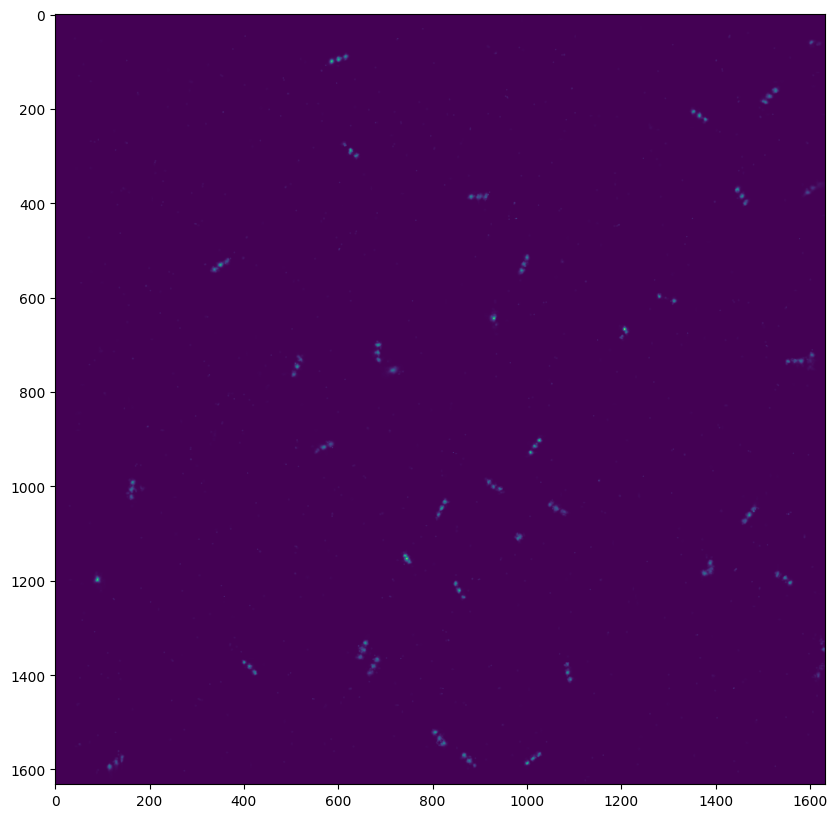

In [12]:
#We create the image based on this Gaussian-blurred visualisation
image = Gaussian_display.GaussianKernel_locPrec(driftCorrData[0],globalSettings,px_size="5") #type:ignore

print(f"Visualisation complete! \n \nProvided metadata: \n{image[1]}")

#And we visualise it
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(image[0])